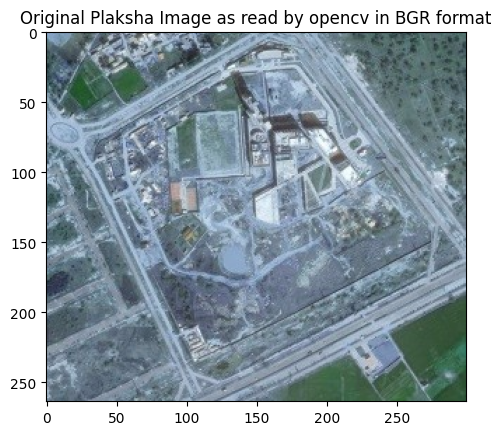

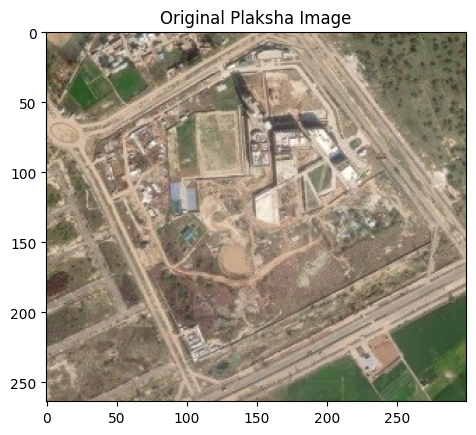

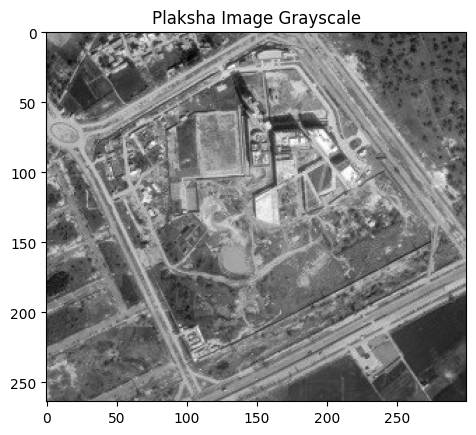

/tmp/ipykernel_22597/1209007691.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  Output_images.append(reconstructed_plaksha.astype(np.uint8))


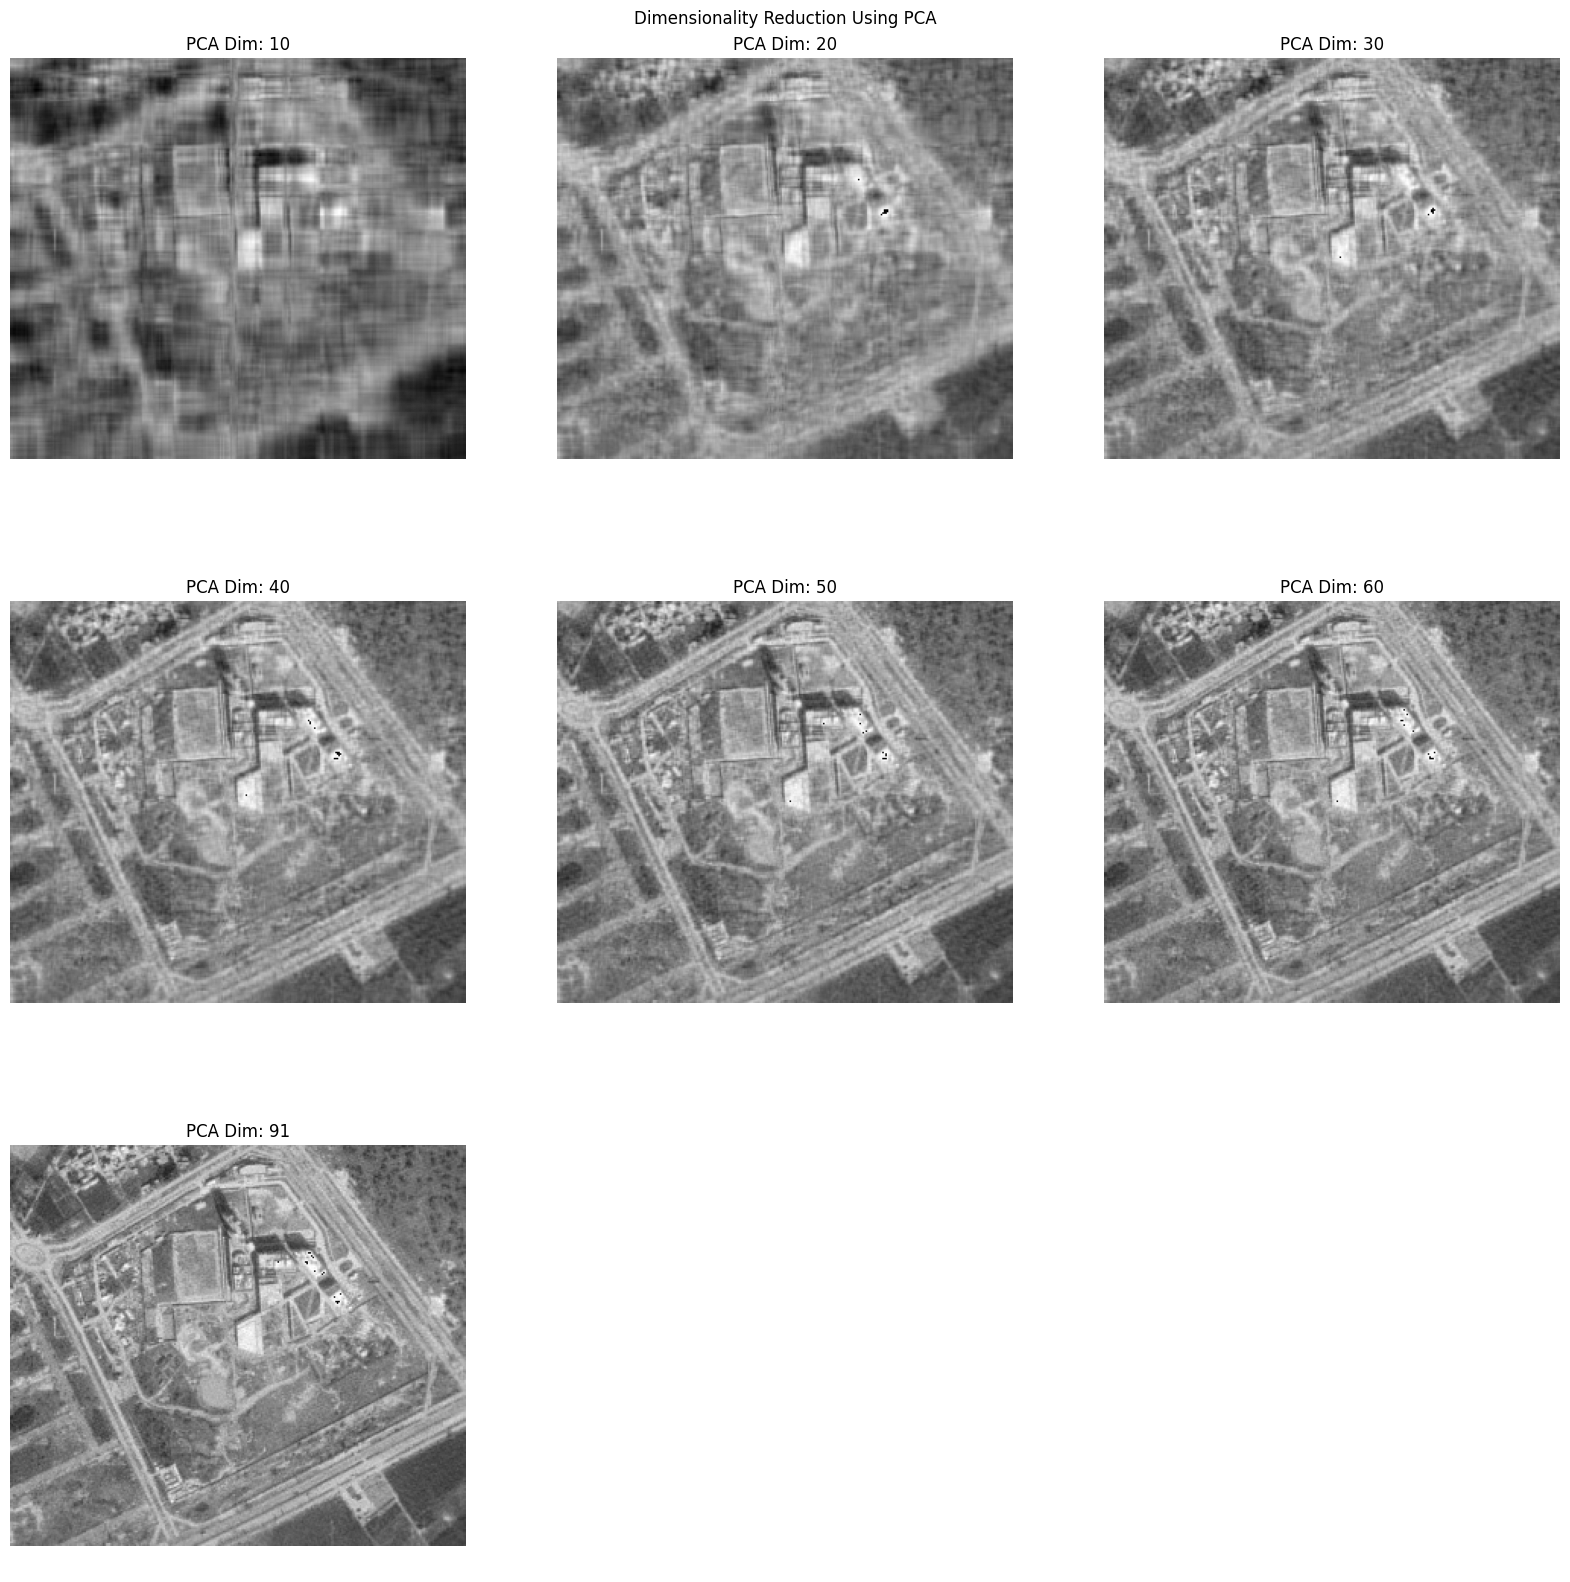

Explained variance ratio using 10 components: 0.6029367716503338
Explained variance ratio using 10 components: 60.29%
Number of components to explain 95% variance: 1
Explained variance ratio using 20 components: 0.732563100302839
Explained variance ratio using 20 components: 73.26%
Number of components to explain 95% variance: 1
Explained variance ratio using 30 components: 0.8034569984053647
Explained variance ratio using 30 components: 80.35%
Number of components to explain 95% variance: 1
Explained variance ratio using 40 components: 0.8494518032632159
Explained variance ratio using 40 components: 84.95%
Number of components to explain 95% variance: 1
Explained variance ratio using 50 components: 0.8816714865303023
Explained variance ratio using 50 components: 88.17%
Number of components to explain 95% variance: 1
Explained variance ratio using 60 components: 0.9052922410495572
Explained variance ratio using 60 components: 90.53%
Number of components to explain 95% variance: 1
Expla

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plaksha = cv2.imread('sat_image_plaksha.jpg')
plt.title('Original Plaksha Image as read by opencv in BGR format')
plt.imshow(plaksha)
plt.show()

plt.imshow(cv2.cvtColor(plaksha, cv2.COLOR_BGR2RGB))
plt.title('Original Plaksha Image')
plt.show()

plaksha_gray = cv2.cvtColor(plaksha, cv2.COLOR_BGR2GRAY)
plt.imshow(plaksha_gray, cmap='gray')
plt.title('Plaksha Image Grayscale')
plt.show()

plaksha_double = plaksha_gray.astype(np.float64)

plaksha_mean_column = np.mean(plaksha_double, axis=0)
plaksha_subtracted = plaksha_double - plaksha_mean_column


plaksha_cov = np.cov(plaksha_subtracted.T)

eigenvalues, eigenvectors = np.linalg.eig(plaksha_cov)

sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

sorted_eigenvectors = eigenvectors[:, sorted_eigenvalues]

Num_components = [10,20,30,40,50,60,91, 300]
Output_images = [ ]

for num in Num_components:
    selected_components = sorted_eigenvectors[:, :num]
    output_image = np.dot(selected_components.T, plaksha_subtracted.T).T
    reconstructed_plaksha = np.dot(selected_components,output_image.T).T + plaksha_mean_column
    Output_images.append(reconstructed_plaksha.astype(np.uint8))


plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Dimensionality Reduction Using PCA')
for i in range(len(Num_components)):
    plt.subplot(3, 3, i+1)
    plt.imshow(Output_images[i], cmap='gray')
    plt.title(f"PCA Dim: {Num_components[i]}")
    plt.axis('off')
plt.show()

for num in Num_components:
    pca = PCA(n_components=num)
    pca.fit(plaksha_double)
    explained_variance_ratio = pca.explained_variance_ratio_
    total_variance_explained = np.sum(explained_variance_ratio)
    print(f"Explained variance ratio using {num} components: {total_variance_explained}")
    print(f"Explained variance ratio using {num} components: {round(total_variance_explained,4) * 100}%")
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
    n_components_to_explain_95_variance = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1
    print(f"Number of components to explain 95% variance: {n_components_to_explain_95_variance}")




